<a href="https://colab.research.google.com/github/ogdtg/starter-code-ogdtg/blob/main/pattern/py_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Open Government Data, provided by **Canton Thurgau**
*Autogenerated Python starter code for dataset with the identifier* **_IDENTIFIER_**

[Link to dataset on data.tg.ch](https://data.tg.ch/explore/dataset/_IDENTIFIER_/information/)


## Dataset
# **_DATANAME_**

## Description

_DESCRIPTION_

## Metadata

- Issued                   : _CREATED_
- Modified                 : _MODIFIED_
- Rights                   : _LICENSE_
- Keywords                 : _KEYWORDS_

## Imports and helper functions

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)
import requests
import pandas as pd
import json


In [55]:
# helper function for reading datasets with proper separator
def get_dataset(dataset_id):
    url = f"https://data.tg.ch/api/explore/v2.0/catalog/datasets/{dataset_id}/exports/json"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data)
    return df

def get_metadata(metadata, dataset_id):
    url = f'https://kantonthurgau.opendatasoft.com/api/explore/v2.0/catalog/datasets?select={metadata}&where=dataset_id%3D%22{dataset_id}%22&offset=0&timezone=UTC'
    headers = {'accept': 'application/json; charset=utf-8'}
    response = requests.get(url, headers=headers)
    json_data = response.json()
    extracted_metadata = json_data['datasets'][0]['dataset'][metadata]
    return extracted_metadata




## Load data


In [70]:
# Read Data
dataset_id = '_IDENTIFIER_'

df = get_dataset(dataset_id)

df.head()

,jahr,geschaeft,bezirk_nr_bfs,bezirk_bez,bfs_nr_gemeinde,gemeinde_name,kand_nachname,kand_vorname,kand_wohnort,kand_id,...,kand_stimmen_veraendert,kand_stimmen_total,liste_zusatzstimmen,listen_parteistimmen_total,06_sp,08_fdp,10_cvp,11_svp,99_leere_liste,gewaehlt
0,2004,GR-Wahlen,2003,Diessenhofen,4536,Basadingen-Schlattingen,Badraun,Daniel,Schlattingen,1,...,59,165,15,354,18.0,5.0,5.0,6.0,25.0,1
1,2004,GR-Wahlen,2003,Diessenhofen,4536,Basadingen-Schlattingen,Dubach,Ruedi,Diessenhofen,2,...,24,77,15,354,14.0,2.0,NaN,2.0,6.0,0
2,2004,GR-Wahlen,2003,Diessenhofen,4536,Basadingen-Schlattingen,Winet,Hans,Diessenhofen,3,...,35,62,1,249,1.0,18.0,1.0,3.0,12.0,0
3,2004,GR-Wahlen,2003,Diessenhofen,4536,Basadingen-Schlattingen,Engel,Kurt,Schlatt,1,...,161,204,5,626,NaN,3.0,6.0,132.0,20.0,1
4,2004,GR-Wahlen,2003,Diessenhofen,4536,Basadingen-Schlattingen,Frank,Gerhard,Basadingen,2,...,102,145,5,626,4.0,6.0,3.0,77.0,12.0,0


In [71]:
# Dimensions of the Dataset
dimensions = df.shape
num_rows = dimensions[0]
num_cols = dimensions[1]

print("Number of rows (observations):", num_rows)
print("Number of columns (variables):", num_cols)

Number of rows (observations): 42
Number of columns (variables): 28


## Explore Metadata

In [72]:
# Look at the fields
fields = get_metadata('fields',dataset_id)
fields_df = pd.DataFrame(fields)

fields_df

,name,description,annotations,label,type
0,jahr,Wahljahr,{},JAHR,text
1,geschaeft,Geschäft,{},GESCHAEFT,text
2,bezirk_nr_bfs,Bezirksnummer gemäss Bundesamt für Statistik B...,{},BEZIRK_NR_BFS,text
3,bezirk_bez,Bezirksbezeichnung,{},BEZIRK_BEZ,text
4,bfs_nr_gemeinde,Gemeindenummer gemäss Bundesamt für Statistik ...,{'facetsort': '-count'},BFS_NR_GEMEINDE,text
5,gemeinde_name,Gemeindename,{'sortable': True},GEMEINDE_NAME,text
6,kand_nachname,Nachname der Kandidatin/des Kandidaten,{},KAND_NACHNAME,text
7,kand_vorname,Vorname der Kandidatin/des Kandidaten,{},KAND_VORNAME,text
8,kand_wohnort,Wohnort der Kandidatin/des Kandidaten,{},KAND_WOHNORT,text
9,kand_id,Reihenfolge/Nummer Kandidat/Kandidatin innerha...,{},KAND_ID,int


In [73]:
# Keywords
keyword = get_metadata("keyword", dataset_id)

# Publisher
publisher = get_metadata("publisher", dataset_id)

print(f'Keywords: {keyword}')
print(f'Publisher: {publisher}')

Keywords: ['Bezirk ', 'Diessenhofen ', 'Gemeinde ', 'Wahlen ', 'Kantonale Wahlen', 'Grosser Rat', 'Grossratswahlen ', 'Wahlzettel ', 'Stimmen ', 'Kandidat', 'Kandidatin', 'panaschieren', 'Panaschierstatistik ', 'Kantonsrat']
Publisher: Dienststelle für Statistik Kanton Thurgau


## Analyze data

In [74]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   jahr                           42 non-null     object 
 1   geschaeft                      42 non-null     object 
 2   bezirk_nr_bfs                  42 non-null     object 
 3   bezirk_bez                     42 non-null     object 
 4   bfs_nr_gemeinde                42 non-null     object 
 5   gemeinde_name                  42 non-null     object 
 6   kand_nachname                  42 non-null     object 
 7   kand_vorname                   42 non-null     object 
 8   kand_wohnort                   42 non-null     object 
 9   kand_id                        42 non-null     int64  
 10  liste_kand_id                  42 non-null     int64  
 11  liste_id                       42 non-null     int64  
 12  liste_code                     42 non-null     objec

In [76]:
# describe non-numerical features
try:
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(df.describe(exclude='number'))
except:
    print("No categorical data in dataset.")

,jahr,geschaeft,bezirk_nr_bfs,bezirk_bez,bfs_nr_gemeinde,gemeinde_name,kand_nachname,kand_vorname,kand_wohnort,liste_code,liste_bezeichnung
count,42,42,42,42,42,42,42,42,42,42,42
unique,1,1,1,1,3,3,14,12,4,4,4
top,2004,GR-Wahlen,2003,Diessenhofen,4536,Basadingen-Schlattingen,Badraun,Hans,Diessenhofen,SVP,Schweizerische Volkspartei / SVP
freq,42,42,42,42,14,14,3,6,21,12,12


In [77]:
# describe numerical features
try:
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(df.describe(include='number'))
except:
    print("No numercial data in dataset.")

,kand_id,liste_kand_id,liste_id,liste_wahlzettel_unveraendert,liste_wahlzettel_veraendert,kand_stimmen_panaschiert,kand_stimmen_unveraendert,kand_stimmen_veraendert,kand_stimmen_total,liste_zusatzstimmen,listen_parteistimmen_total,06_sp,08_fdp,10_cvp,11_svp,99_leere_liste,gewaehlt
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,34.00,38.00,35.00,36.00,41.00,42.00
mean,2.29,902.29,9.00,42.98,59.10,15.38,51.05,80.33,131.38,8.67,472.21,11.26,12.87,11.40,37.17,18.66,0.29
std,1.04,191.51,1.91,30.49,40.18,15.18,46.10,63.86,91.19,6.35,249.44,17.73,17.47,14.42,48.69,15.44,0.46
min,1.00,601.00,6.00,7.00,11.00,1.00,7.00,12.00,19.00,0.00,113.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,1.00,801.00,8.00,24.00,27.00,4.25,24.00,29.50,59.50,4.25,252.00,2.00,3.00,3.50,3.00,7.00,0.00
50%,2.00,"1,001.50",10.00,39.50,57.00,9.50,43.00,60.00,116.50,6.00,430.00,5.00,6.00,6.00,10.50,14.00,0.00
75%,3.00,"1,101.00",11.00,54.00,108.00,19.75,56.00,108.00,169.00,14.00,733.25,12.50,16.00,9.50,54.50,24.00,1.00
max,4.00,"1,104.00",11.00,133.00,121.00,64.00,266.00,266.00,417.00,20.00,860.00,92.00,76.00,60.00,172.00,59.00,1.00


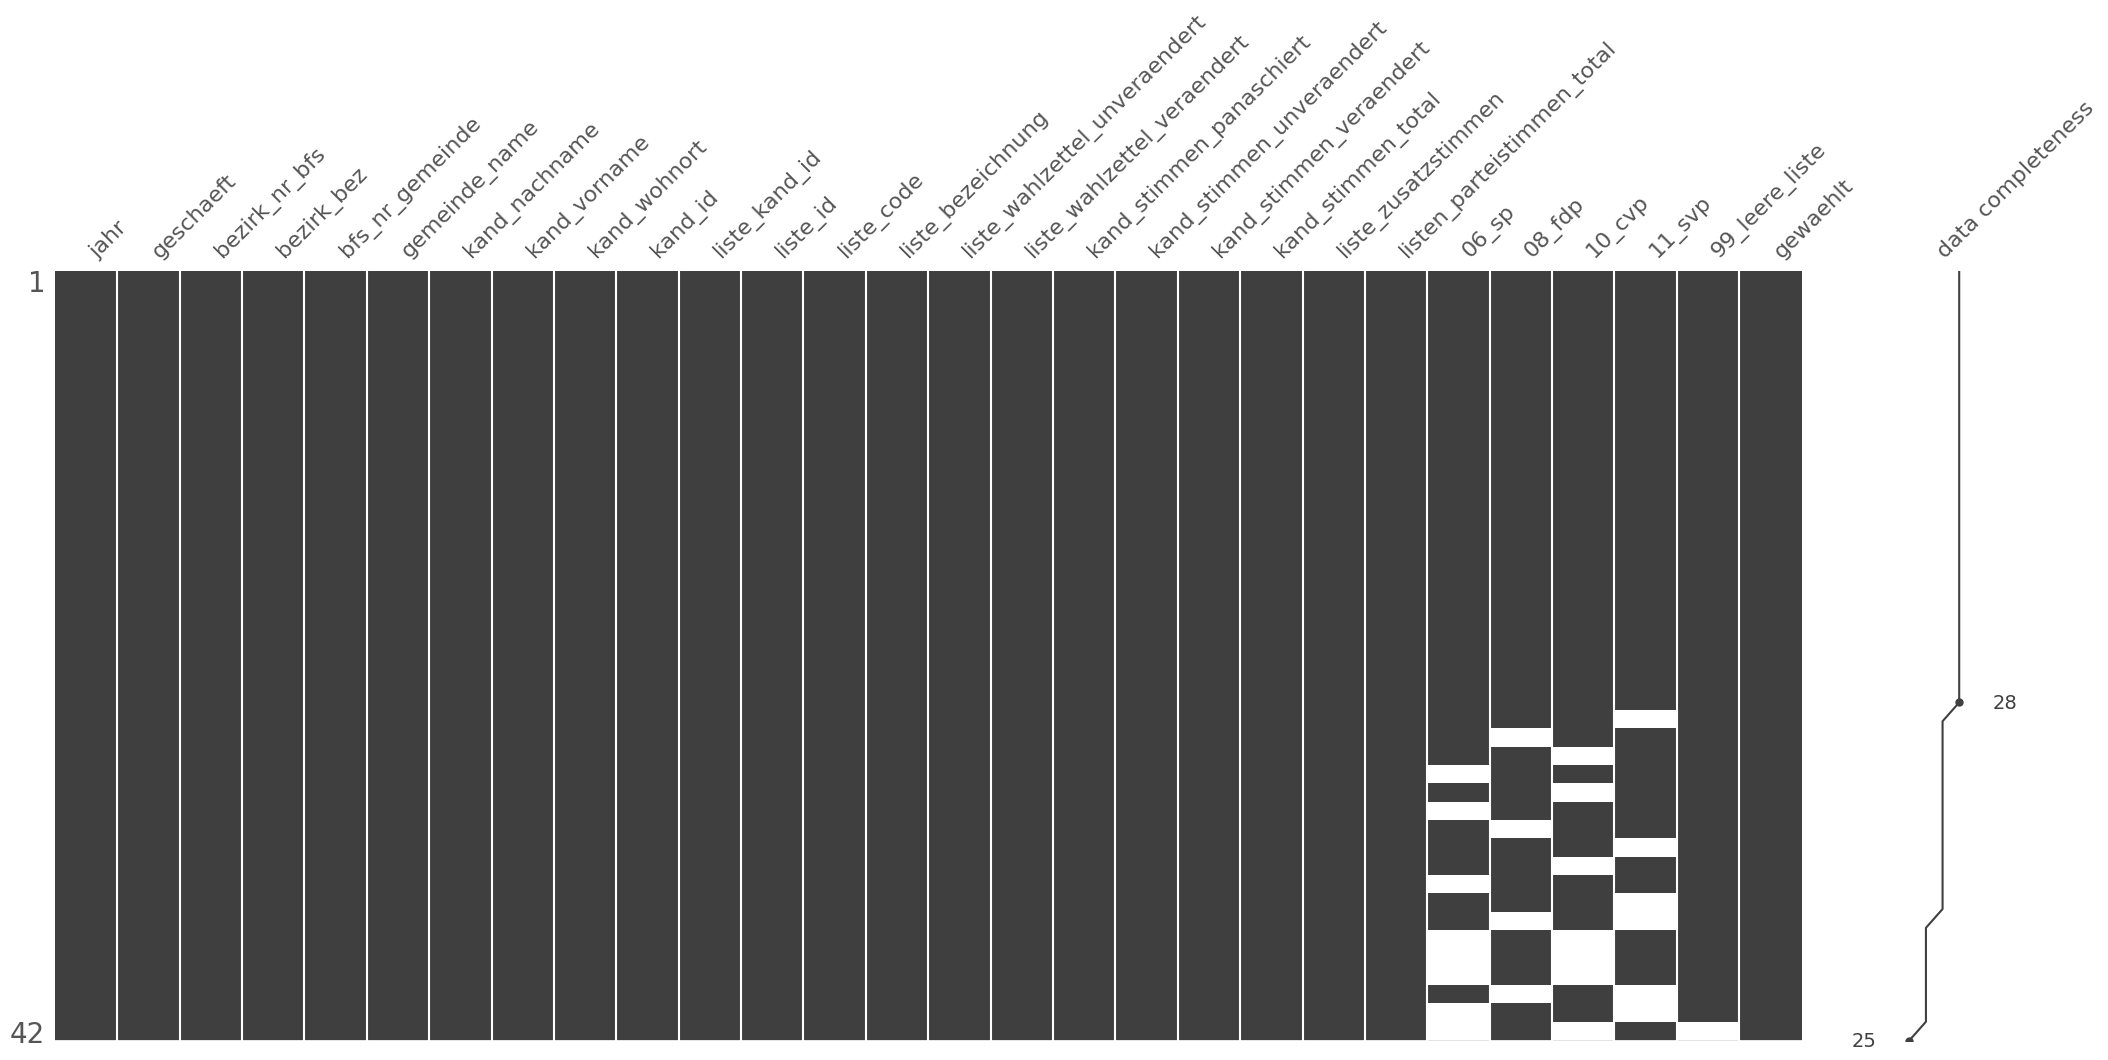

In [78]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

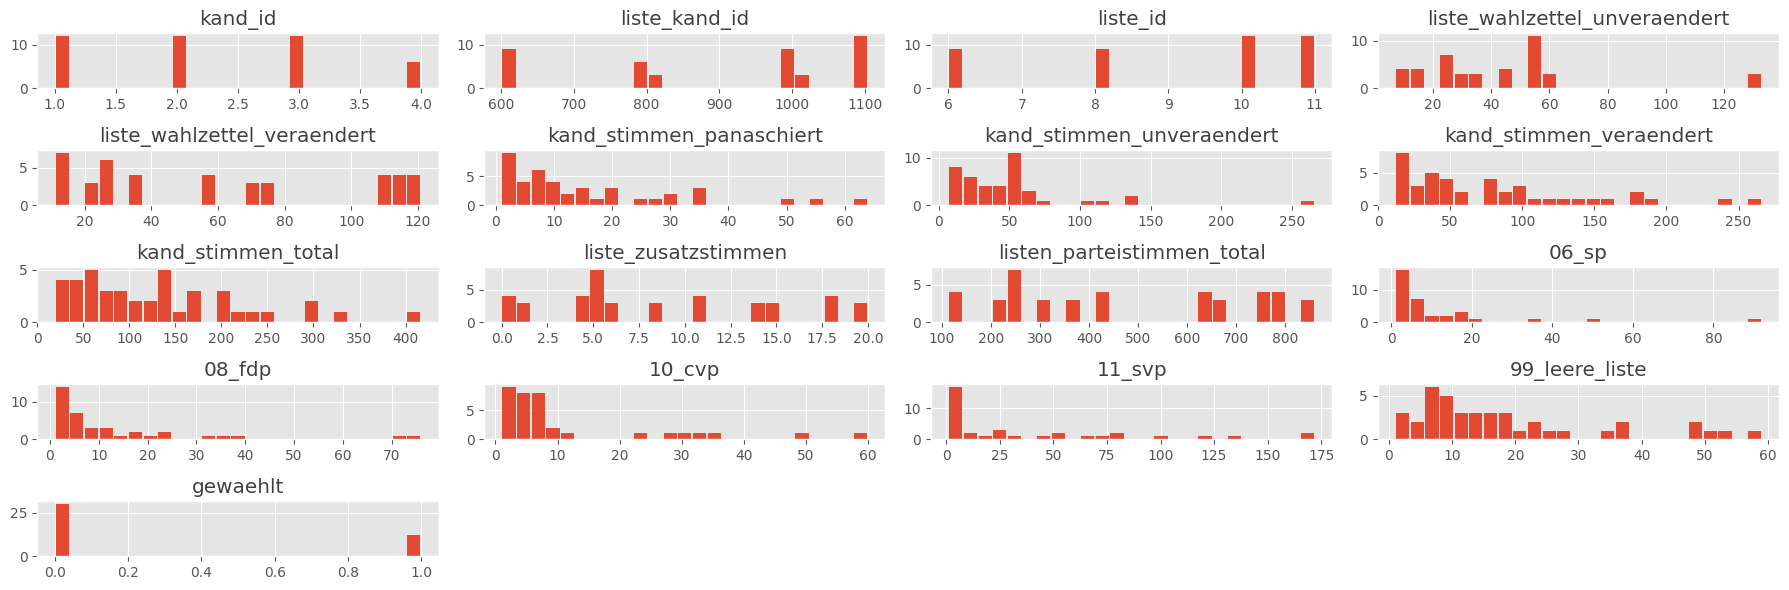

In [79]:
# plot a histogram for each numerical feature
try:
    df.hist(bins=25, rwidth=.9)
    plt.tight_layout()
    plt.show()
except:
    print("No numercial data to plot.")

In [ ]:
# continue your code here...

------------------------------------------------------------------------

## Questions about the data?

Contact us via [Mail](mailto:ogd@tg.ch) or visit our [GitHub presence](https://github.com/ogdtg)


------------------------------------------------------------------------

OGD-Koordinationsstelle Kanton Thurgau | Grabenstrasse 8 | 8510 Frauenfeld
